<a href="https://colab.research.google.com/github/MinaGO1/Pathline-task/blob/main/Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing needed modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # to avoid any warning in the code
pd.set_option('display.max_columns' , None) # Set max columns can be displayed to none to show all columns of our data

## Feature engineering & EDA

In [2]:
df = pd.read_csv('/content/laptop_prices.csv') # importing our dataset
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,1600,No,Yes,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,900,No,No,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,1800,No,Yes,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,1600,No,Yes,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

## First look:
> In this section, I will provide my intersets about this data for the first look
- I think I can get screen resolution from screen width and screen height
- Also I can get total storage of the laptop form primary and secondary storages
- I think if I see retina display is by only apple laptops or not
- Also I want to see what the most popular OS in our dataset
- Also I want to see what the company have the light laptops
- What is the most inches of laptops comapany
- Percentage of touch screen laptops
- The most CPU company used
- The most CPU model used for each CPU company
- The most CPU frequency in our data

First thing I want to get screen resolution and total storage

In [4]:
#resolution
df['ScreenRes']= df['ScreenW'].astype(str) + 'x' + df['ScreenH'].astype(str)

In [5]:
df['ScreenRes'].sample(5)

,ScreenRes
782,1920x1080
788,1920x1080
1208,1600x900
354,1920x1080
734,1920x1080


Ok now I want to get total storage from primary and secondary storages

In [6]:
df['Storage'] = df['PrimaryStorage'] + df['SecondaryStorage']

In [7]:
df['Storage']

,Storage
0,128
1,128
2,256
3,512
4,256
...,...
1270,128
1271,512
1272,64
1273,1024


In [8]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,ScreenRes,Storage
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,1600,No,Yes,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640,2560x1600,128
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,900,No,No,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000,1440x900,128
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620,1920x1080,256
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,1800,No,Yes,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455,2880x1800,512
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,1600,No,Yes,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650,2560x1600,256


Ok now I want to order Storage column to be before primary and secondary storages and resolution before screen width and height

In [9]:
columns = list(df.columns)
columns

['Company',
 'Product',
 'TypeName',
 'Inches',
 'Ram',
 'OS',
 'Weight',
 'Price_euros',
 'Screen',
 'ScreenW',
 'ScreenH',
 'Touchscreen',
 'IPSpanel',
 'RetinaDisplay',
 'CPU_company',
 'CPU_freq',
 'CPU_model',
 'PrimaryStorage',
 'SecondaryStorage',
 'PrimaryStorageType',
 'SecondaryStorageType',
 'GPU_company',
 'GPU_model',
 'ScreenRes',
 'Storage']

In [10]:
(columns.index('PrimaryStorage'),
 columns.index('ScreenW'))

(17, 9)

In [11]:
ordered_Columns= []
for index,col in enumerate(columns):
    """This for loop check if index is screen width or primary storage and put screen resolution and storage columns in this place"""
    if index == columns.index('PrimaryStorage'):
        ordered_Columns.append('Storage')
        ordered_Columns.append('PrimaryStorage')
    elif index == columns.index('ScreenW'):
        ordered_Columns.append('ScreenRes')
        ordered_Columns.append('ScreenW')
    elif col not in ['Storage' ,'ScreenRes' , 'PrimaryStorage']:ordered_Columns.append(col)


In [12]:
ordered_Columns

['Company',
 'Product',
 'TypeName',
 'Inches',
 'Ram',
 'OS',
 'Weight',
 'Price_euros',
 'Screen',
 'ScreenRes',
 'ScreenW',
 'ScreenH',
 'Touchscreen',
 'IPSpanel',
 'RetinaDisplay',
 'CPU_company',
 'CPU_freq',
 'CPU_model',
 'Storage',
 'PrimaryStorage',
 'SecondaryStorage',
 'PrimaryStorageType',
 'SecondaryStorageType',
 'GPU_company',
 'GPU_model']

In [13]:
df = df[ordered_Columns] #apply our changes

In [14]:
df.sample(10)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenRes,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,Storage,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
1100,Dell,Latitude E5270,Ultrabook,12.5,4,Windows 7,1.50,1135.15,Standard,1366x768,1366,768,No,No,No,Intel,2.3,Core i3 6100U,500,500,0,HDD,No,Intel,HD Graphics 520
344,Dell,XPS 13,Ultrabook,13.3,8,Windows 10,1.20,1579.00,Full HD,1920x1080,1920,1080,No,No,No,Intel,1.8,Core i7 8550U,256,256,0,SSD,No,Intel,UHD Graphics 620
720,Lenovo,ThinkPad X1,Ultrabook,14.0,8,Windows 10,1.17,1686.64,Quad HD+,2560x1440,2560,1440,No,Yes,No,Intel,2.5,Core i7 6500U,512,512,0,SSD,No,Intel,HD Graphics 520
508,HP,Envy 13-AB002nv,Ultrabook,13.3,8,Windows 10,1.34,1323.00,Full HD,1920x1080,1920,1080,No,Yes,No,Intel,2.7,Core i7 7500U,512,512,0,SSD,No,Intel,HD Graphics 620
1153,Dell,Inspiron 7567,Gaming,15.6,8,Windows 10,2.62,1199.00,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.8,Core i7 7700HQ,1024,1024,0,HDD,No,Nvidia,GeForce GTX 1050Ti
1031,Acer,Aspire 3,Notebook,15.6,6,Windows 10,2.10,409.00,Standard,1366x768,1366,768,No,No,No,AMD,3.0,A9-Series 9420,1024,1024,0,HDD,No,AMD,Radeon R5
1136,HP,ZBook 17,Workstation,17.3,8,Windows 7,3.00,3949.40,Full HD,1920x1080,1920,1080,No,Yes,No,Intel,2.6,Core i7 6700HQ,256,256,0,SSD,No,Nvidia,Quadro M3000M
32,HP,17-ak001nv (A6-9220/4GB/500GB/Radeon,Notebook,17.3,4,Windows 10,2.71,439.00,Full HD,1920x1080,1920,1080,No,No,No,AMD,2.5,A6-Series 9220,500,500,0,HDD,No,AMD,Radeon 530
909,LG,Gram 14Z970,Ultrabook,14.0,8,Windows 10,0.98,1899.00,Full HD,1920x1080,1920,1080,Yes,Yes,No,Intel,2.7,Core i7 7500U,512,512,0,SSD,No,Intel,HD Graphics 620
1269,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,4,Windows 10,2.20,720.32,Standard,1366x768,1366,768,No,No,No,Intel,2.5,Core i7 6500U,500,500,0,HDD,No,Nvidia,GeForce 920M


I want also to make new column for secondarystorage If there are or not

In [15]:
# I think I can get our information from secondary storage type and socondary storage
df.loc[df['SecondaryStorage'] == 0].shape[0] # length of all laptops haven't secondary storage

1067

In [16]:
df.loc[df['SecondaryStorageType'] == 'No'].shape[0]
"""That's very good two columns are the same value so I will use secondary storage type column"""

"That's very good two columns are the same value so I will use secondary storage type column"

In [17]:
def secondary_storage(value):
    if value != 'No':return True
    else:return False
df['SecondaryStorage?'] = [secondary_storage(v) for v in df['SecondaryStorageType']]

In [18]:
df.sample(10)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenRes,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,Storage,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,SecondaryStorage?
1000,Acer,Nitro 5,Gaming,15.6,8,Windows 10,2.70,1260.00,Full HD,1920x1080,1920,1080,No,Yes,No,Intel,2.8,Core i7 7700HQ,1152,128,1024,SSD,HDD,Nvidia,GeForce GTX 1050,True
1146,HP,EliteBook 820,Ultrabook,12.5,8,Windows 7,1.26,2296.95,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.5,Core i7 6500U,256,256,0,SSD,No,Intel,HD Graphics 520,False
756,HP,15-cb003na (i5-7300HQ/8GB/1TB,Notebook,15.6,8,Windows 10,2.20,1099.00,Full HD,1920x1080,1920,1080,No,Yes,No,Intel,2.5,Core i5 7300HQ,1152,128,1024,SSD,HDD,Nvidia,GeForce GTX 1050,True
363,HP,250 G6,Notebook,15.6,8,Windows 10,1.86,639.00,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,1024,1024,0,HDD,No,Intel,HD Graphics 620,False
85,Dell,Inspiron 7577,Gaming,15.6,16,Windows 10,2.65,1349.00,Full HD,1920x1080,1920,1080,No,Yes,No,Intel,2.8,Core i7 7700HQ,1152,128,1024,SSD,HDD,Nvidia,GeForce GTX 1050 Ti,True
758,Dell,Alienware 17,Gaming,15.6,16,Windows 10,4.42,2868.99,4K Ultra HD,3840x2160,3840,2160,No,Yes,No,Intel,2.8,Core i7 7700HQ,1280,256,1024,SSD,HDD,Nvidia,GeForce GTX 1070,True
685,Dell,Alienware 15,Gaming,15.6,16,Windows 10,3.49,2813.75,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.9,Core i7 7820HK,1280,256,1024,SSD,HDD,Nvidia,GeForce GTX 1070,True
265,Dell,Inspiron 5579,2 in 1 Convertible,15.6,8,Windows 10,2.67,799.00,Full HD,1920x1080,1920,1080,Yes,No,No,Intel,1.6,Core i5 8250U,256,256,0,SSD,No,Intel,UHD Graphics 620,False
845,Dell,Vostro 3568,Notebook,15.6,4,Windows 10,2.18,739.00,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.7,Core i7 7500U,256,256,0,SSD,No,AMD,Radeon R5 M420,False
640,Lenovo,Legion Y520-15IKBN,Gaming,15.6,8,Windows 10,2.50,1109.00,Full HD,1920x1080,1920,1080,No,Yes,No,Intel,2.8,Core i7 7700HQ,1152,128,1024,SSD,HDD,Nvidia,GeForce GTX 1050M,True


ok now I want to order primary storage type to be before primary storage and secondary storage ? to be before primary storage type

In [19]:
ordered_Columns = []
columns = df.columns.to_list()
for i , col in enumerate(columns):
    """In this for loop I'm ordered some storage columns"""
    if i == columns.index('SecondaryStorage'):ordered_Columns.append('PrimaryStorageType') ; \
        ordered_Columns.append('SecondaryStorage?'); \
        ordered_Columns.append('SecondaryStorage')
    elif col not in ['SecondaryStorage?' , 'PrimaryStorageType']:ordered_Columns.append(col)
ordered_Columns

['Company',
 'Product',
 'TypeName',
 'Inches',
 'Ram',
 'OS',
 'Weight',
 'Price_euros',
 'Screen',
 'ScreenRes',
 'ScreenW',
 'ScreenH',
 'Touchscreen',
 'IPSpanel',
 'RetinaDisplay',
 'CPU_company',
 'CPU_freq',
 'CPU_model',
 'Storage',
 'PrimaryStorage',
 'PrimaryStorageType',
 'SecondaryStorage?',
 'SecondaryStorage',
 'SecondaryStorageType',
 'GPU_company',
 'GPU_model']

that's awesome

In [20]:
df = df[ordered_Columns]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

In [22]:
df.sample(10)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenRes,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,Storage,PrimaryStorage,PrimaryStorageType,SecondaryStorage?,SecondaryStorage,SecondaryStorageType,GPU_company,GPU_model
186,Dell,XPS 15,Notebook,15.6,16,Windows 10,2.06,2397.00,4K Ultra HD,3840x2160,3840,2160,Yes,No,No,Intel,2.8,Core i7 7700HQ,512,512,SSD,False,0,No,Nvidia,GeForce GTX 1050
744,Lenovo,Thinkpad P51s,Workstation,15.6,16,Windows 10,2.50,3299.00,4K Ultra HD,3840x2160,3840,2160,No,Yes,No,Intel,2.8,Core i7 7600U,1024,1024,SSD,False,0,No,Nvidia,Quadro M520M
934,Toshiba,Tecra Z40-C-12X,Notebook,14.0,4,Windows 10,1.47,1105.00,Full HD,1920x1080,1920,1080,No,Yes,No,Intel,2.3,Core i5 6200U,128,128,SSD,False,0,No,Intel,HD Graphics 520
504,Lenovo,Chromebook N23,Netbook,11.6,4,Chrome OS,1.25,265.00,Standard,1366x768,1366,768,No,No,No,Intel,1.6,Celeron Dual Core N3060,16,16,SSD,False,0,No,Intel,HD Graphics 400
55,Dell,Inspiron 3576,Notebook,15.6,8,Windows 10,2.13,767.80,Full HD,1920x1080,1920,1080,No,No,No,Intel,1.8,Core i7 8550U,256,256,SSD,False,0,No,AMD,Radeon 520
728,Dell,Inspiron 5567,Notebook,15.6,8,Linux,2.32,589.52,Standard,1366x768,1366,768,No,No,No,Intel,2.5,Core i5 7200U,1024,1024,HDD,False,0,No,AMD,Radeon R7 M445
767,Dell,Inspiron 7559,Gaming,15.6,16,Windows 10,2.72,1099.00,4K Ultra HD,3840x2160,3840,2160,Yes,Yes,No,Intel,2.6,Core i7 6700HQ,1152,128,SSD,True,1024,HDD,Nvidia,GeForce GTX 960M
371,Acer,Aspire 3,Notebook,15.6,4,Windows 10,2.10,426.00,Standard,1366x768,1366,768,No,No,No,AMD,3.0,A9-Series 9420,128,128,SSD,False,0,No,AMD,Radeon R5
634,Asus,X541NA-GO414T (N3350/8GB/1TB/W10),Notebook,15.6,8,Windows 10,2.00,399.00,Standard,1366x768,1366,768,No,No,No,Intel,1.1,Celeron Dual Core N3350,1024,1024,HDD,False,0,No,Intel,HD Graphics 500
283,Lenovo,Ideapad 320-15IKBN,Notebook,15.6,6,Windows 10,2.20,579.00,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,256,SSD,False,0,No,Intel,HD Graphics 620


Ok now let's strat with EDA

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

In [24]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,Storage,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,620.586667,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,482.064003,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,500.000000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,1024.000000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2560.000000,2048.000000,2048.000000


ok Firstly I want to see count of laptops for each comapny

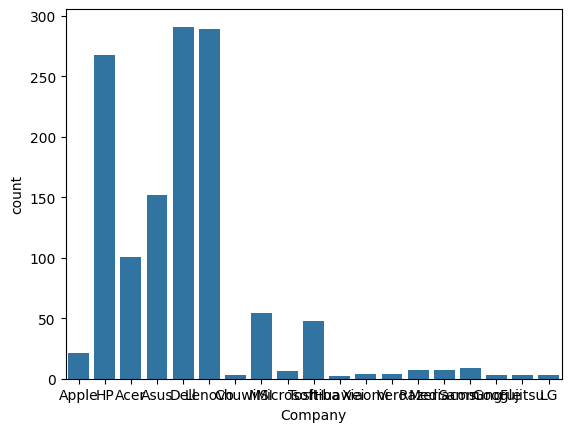

In [25]:
sns.countplot(x='Company' , data=df);
plt.show()

Ok there are overplotting so I should handle that by sorting only most 10 companies

In [26]:
top_10_companies = df['Company'].value_counts(sort=True , ascending=False).head(10)
top_10_companies# Ok that's good

,count
Company,
Dell,291
Lenovo,289
HP,268
Asus,152
Acer,101
MSI,54
Toshiba,48
Apple,21
Samsung,9


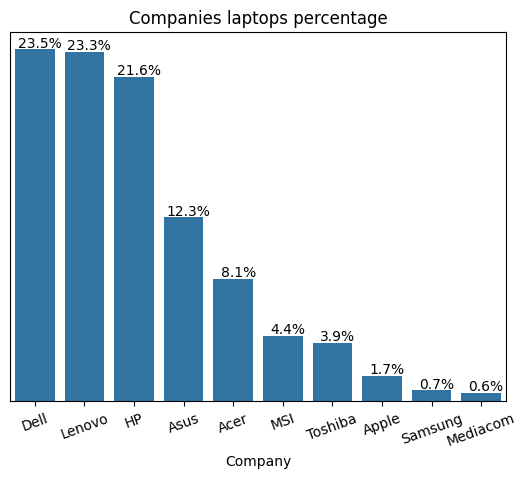

In [27]:
ax = sns.barplot(x=top_10_companies.index, y=top_10_companies.values)
for p in ax.patches:
    plt.text(p.get_x()+.5, p.get_height()+2 , # x , y
             str(
                 round(
                    (int(p.get_height()) / top_10_companies.sum())*100
                    ,1)
                )
             +'%',#percentage
            horizontalalignment='center' # centerting text
            )
plt.xticks(rotation=20)
ax.yaxis.set_visible(False)
plt.title('Companies laptops percentage')
plt.show()


In this chart we also see the percentage are very similiar in top 2 so I can say Dell and Lenovo are the most two companies make laptops in our data and we also see there are big difference between top 1 and top 10 so I think I should use mean in any column to get good result

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

In [29]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,Storage,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,620.586667,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,482.064003,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,500.000000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,1024.000000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2560.000000,2048.000000,2048.000000


now I want to see type name column

In [30]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

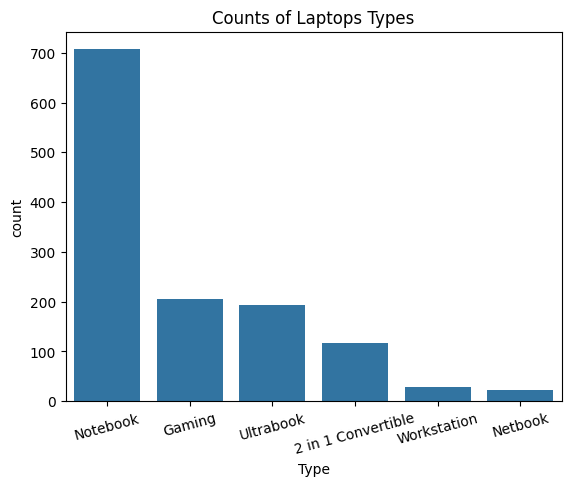

In [31]:
sns.countplot(x='TypeName' , data=df,
              order=df['TypeName'].value_counts(ascending=False, sort=True).index)
plt.xticks(rotation = 15)
plt.title('Counts of Laptops Types')
plt.xlabel('Type')
plt.show()

In this chart notebook laptops are the famouse one in our data with big difference between it and top 2(gaming) and Gaming and ultrabook are almost similiar and also workstation and netbook are very rare in our data, 2 in 1 laptops(laptops that can you convert it to tablet)

> Ok I want to plot disterbution of inches

In [32]:
df['Inches'].unique()

array([13.3, 15.6, 15.4, 14. , 12. , 11.6, 17.3, 10.1, 13.5, 12.5, 13. ,
       18.4, 13.9, 12.3, 17. , 15. , 14.1, 11.3])

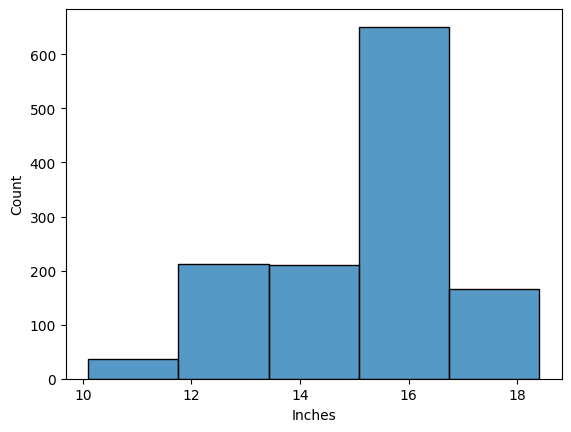

In [33]:
sns.histplot(x='Inches' , data=df, bins=5)
plt.show()

In this chart I decreased number of bins to be 5 because of smaller range of inches,

we also see 15-17 inch are the most famous
14 and 12 are very similiar to each other

> now I want to see range of inches mean

In [34]:
inches_means = []
for _ in range(10_000):
    bootsample = df['Inches'].sample(320 , replace=True)
    inches_means.append(bootsample.mean())

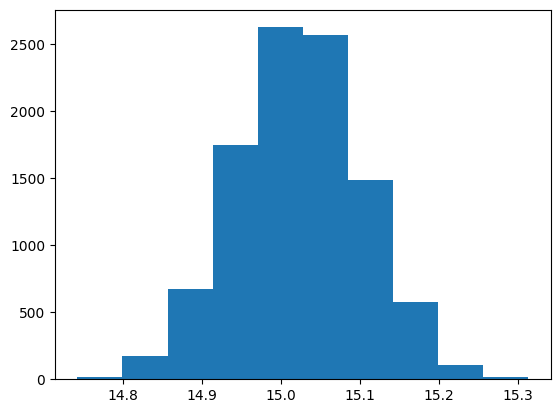

In [35]:
plt.hist(inches_means);
plt.show()

Ok so I will make 95% confidence level in my confidence interval

In [36]:
round(np.percentile(inches_means , 2.5),1) , round(np.percentile(inches_means , 97.5),1)

(np.float64(14.9), np.float64(15.2))

so 95% Inches mean is between 14.9 - 15.2 inch

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

In [38]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,Storage,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,620.586667,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,482.064003,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,500.000000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,1024.000000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2560.000000,2048.000000,2048.000000


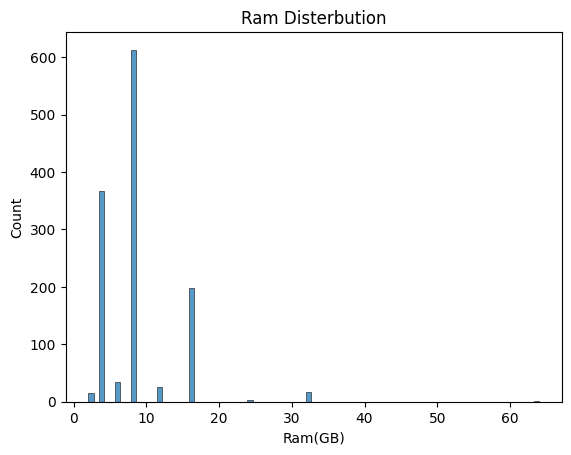

In [39]:
#Plotting Ram disterbution
sns.histplot(x='Ram' , data=df);
plt.title('Ram Disterbution');
plt.xlabel('Ram(GB)');

> I want to decrease bins to be between **0** - **20** GB
- To see more information about our disterbution

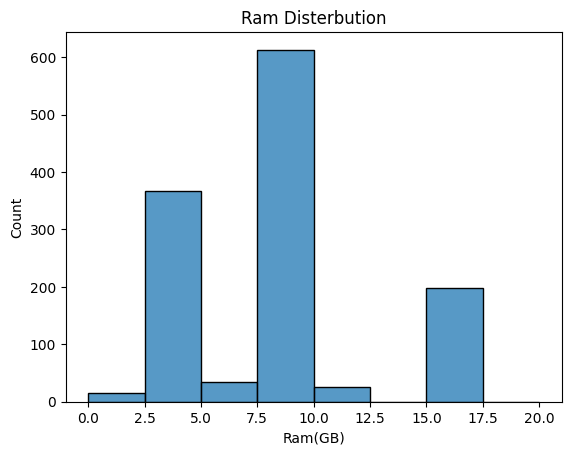

In [40]:
#Making bins
bins = np.arange(0,22.5,2.5)
#Plotting Ram disterbution
sns.histplot(x='Ram' , data=df , bins=bins);
plt.title('Ram Disterbution');
plt.xlabel('Ram(GB)');

### In this chart:
- Most common ram is between **7.5** - **10** GB. In my opinion That's mean 8 GB Ram is most common ram used in laptops
- Mean common ram is between **2.5** - **5.0** GB. In my opinion That's mean 4 GB Ram is mean common ram used in laptops
- Third common ram is betwen **15** - **17.5**. That's mean mean 16 GB is third most common ram used in laptops
- I think reason to be 8 GB is the most common Ram is almost laptops are notebook laptops and notebook laptops arn't need large rams to work well. It needs only 8 GB Ram
- I think only workstaion and gaming laptops needes 16 GB ram or above like 64 GB ram to work well

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

In [42]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,Storage,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,620.586667,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,482.064003,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,500.000000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,1024.000000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2560.000000,2048.000000,2048.000000


- Now I want to see Primary storage vs Secondary storage

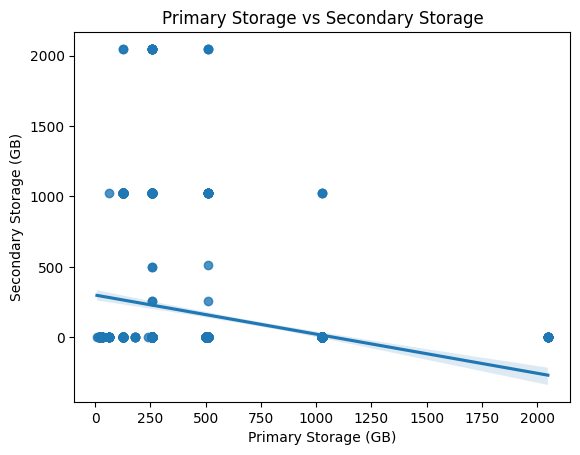

In [43]:
sns.regplot(x='PrimaryStorage',y='SecondaryStorage' ,data=df); # fitting line in our scatterplot
plt.title('Primary Storage vs Secondary Storage');
plt.xlabel('Primary Storage (GB)');
plt.ylabel('Secondary Storage (GB)');

### In this chart:
- I see visually. There are moderate relationship between them,
- This relationship is negative like we see on this line that's means if one of them increased, anthor one will decreased.
- There are many points on 0 of secondary storage that's because there arn't secondary storage in these laptops,
- But most of these laptops have large primary storage.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

In [45]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,Storage,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,620.586667,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,482.064003,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,500.000000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,1024.000000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2560.000000,2048.000000,2048.000000


In [46]:
cpu_df = df.drop('Company' , axis=1).rename(columns={'CPU_company':'Company'})[['Company']] #Dropping company column to add company column of CPUs
cpu_df['Product'] = 'CPU'
gpu_df = df.drop('Company' , axis=1).rename(columns={'GPU_company':'Company'})[['Company']]
gpu_df['Product'] = 'GPU'
cpu_gpu_data = pd.concat([cpu_df , gpu_df])
#This cell to split cpu companies and gpu companies and add hue to our countplot

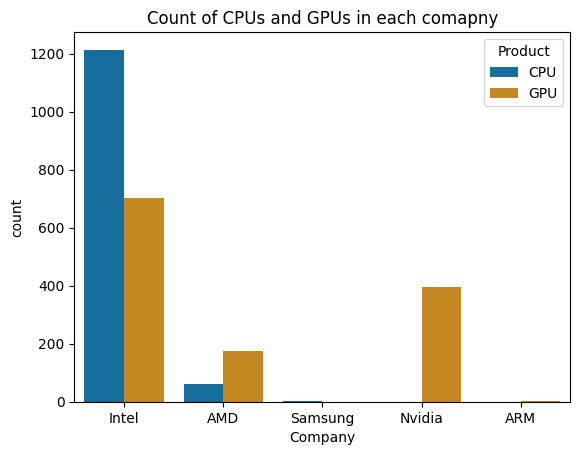

In [47]:
sns.countplot(x='Company' , hue='Product' , data=cpu_gpu_data , palette='colorblind');
plt.title('Count of CPUs and GPUs in each comapny');

### In this chart:
- Intel has a strong hold over both CPUs and GPUs
> I think that's becuase Intel have many CPUs and internal GPUs so I think that's the reason
- Nividia also has a strong hold over on GPUs
> Nividia should be top 1 in external GPUs, so it is top 2 in our data
- AMD has a medium hold over both CPUs and GPUs
- Samsung and ARM arn't almost in our data

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

In [49]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,Storage,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,620.586667,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,482.064003,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,500.000000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,1024.000000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2560.000000,2048.000000,2048.000000


- I will see storage disterbution but with hue

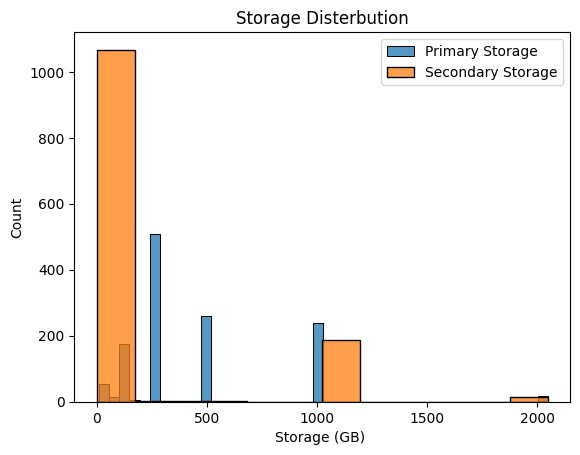

In [50]:
sns.histplot(x='PrimaryStorage' , data=df);
sns.histplot(x='SecondaryStorage' ,data=df);
plt.title('Storage Disterbution');
plt.xlabel('Storage (GB) ');
plt.legend(['Primary Storage' , 'Secondary Storage']);

> Ok I will zoom in between **0** - **500**, then **1000** - **2000**

In [51]:
#Making a function for this chart to avoid repeated code
def storage_chart(bins):
    """
    parms: bins: array or list of bins for hist plot
    This function plot storage disterbution using bins paramater
    first hist plot is for primary storage
    second hist plot is for secondary storage
    return: Hist plot for storage
    """
    sns.histplot(x='PrimaryStorage' , data=df , bins=bins);
    sns.histplot(x='SecondaryStorage' ,data=df , bins=bins);
    plt.title('Storage Disterbution');
    plt.xlabel('Storage (GB)');
    plt.legend(['Primary Storage' , 'Secondary Storage']);

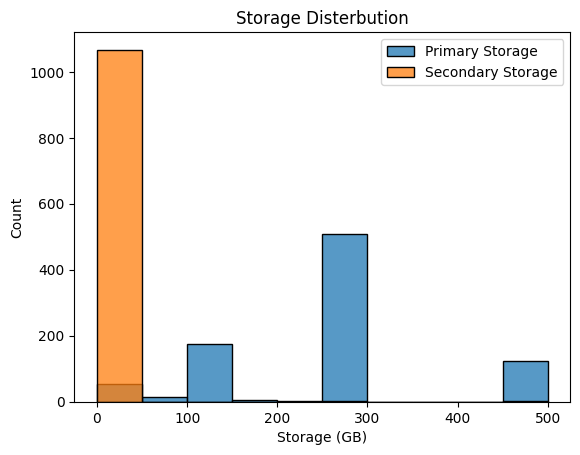

In [52]:
bins = np.arange(0,550,50)
storage_chart(bins)

### In this chart:
- Most common secondary storage is between 0 and 50 GB
> That's expected because seondary storage is only of storing important files or some apps
- Most common primary storage is between 250 and 300 GB
> I think this scope (0 - 500 GB) for notebook laptops not for workstaion or gaming laptops
- mean common priamy storage is between 100 and 150 GB
> I think most commont storage in this scope (100 - 150 GB) in primary storage is 128 GB

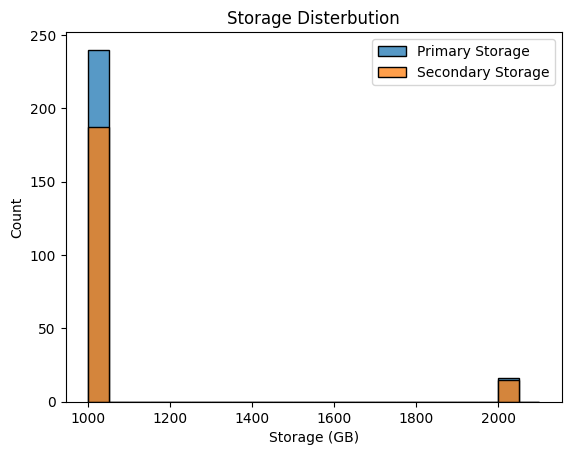

In [53]:
storage_chart(np.arange(1000,2150,50)) # I set bins 1000 and 2100 because 2000 is empty

### In this chart:
- Most common primary and secondary storage is between **1000** and **almost 1050** GB
> This scope for gaming and workstation laptops for expensive laptops
- there some outlires values between 2000 and 2100 GB
> This scope for very high performance laptops and this scope is very rare in our data and our world and this scope is very very expensive

In [54]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenRes,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,Storage,PrimaryStorage,PrimaryStorageType,SecondaryStorage?,SecondaryStorage,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560x1600,2560,1600,No,Yes,Yes,Intel,2.3,Core i5,128,128,SSD,False,0,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440x900,1440,900,No,No,No,Intel,1.8,Core i5,128,128,Flash Storage,False,0,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,256,SSD,False,0,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880x1800,2880,1800,No,Yes,Yes,Intel,2.7,Core i7,512,512,SSD,False,0,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560x1600,2560,1600,No,Yes,Yes,Intel,3.1,Core i5,256,256,SSD,False,0,No,Intel,Iris Plus Graphics 650


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

In [56]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,Storage,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,620.586667,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,482.064003,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,500.000000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,1024.000000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2560.000000,2048.000000,2048.000000


Ok I want to make hypothesis to check there are difference between mean of **Dell** Rams and **Lenovo** Rams because They are the top 2

$$H_0 : \mu_{Dell_R}\ - \mu_{Lenovo_R} \leq 0$$
$$H_1 : \mu_{Dell_R} - \mu_{Lenovo_R} \gt 0$$

In [57]:
df["Company"].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [58]:
(df.query('Company == "Dell"')['Ram'].mean(), # mean rams of Dell
    df.query('Company == "Lenovo"')['Ram'].mean()) # mean rams of Lenovo

(np.float64(9.230240549828178), np.float64(8.055363321799309))

In [59]:
df.shape[0]

1275

In [60]:
# Now I will get dell and lenovo rows to make bootstrap
dell_company = df.query('Company == "Dell"')
lenovo_company = df.query('Company == "Lenovo"')

**Bootstarpping:**
```python
iterations: 10_000
return: difference between their means
diffs : list # Appending differences between dell and lenovo means
```

In [61]:
diffs = []
for _ in range(10_000):
  dell_mean = dell_company.sample(dell_company.shape[0] , replace=True)['Ram'].mean()
  lenovo_mean = lenovo_company.sample(lenovo_company.shape[0] , replace = True)['Ram'].mean()
  diffs.append(dell_mean - lenovo_mean)

In [62]:
#simulating null vals to plot it in chart
null_vals = np.random.normal(0 , np.std(diffs) , 10_000)

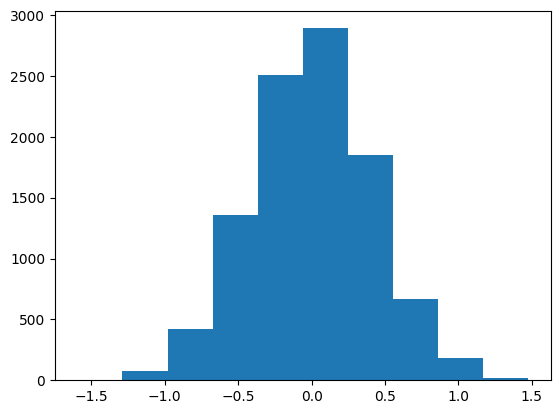

In [63]:
plt.hist(null_vals);

(array([2.200e+01, 1.700e+02, 9.370e+02, 2.351e+03, 3.140e+03, 2.243e+03,
        9.050e+02, 1.940e+02, 3.600e+01, 2.000e+00]),
 array([-0.31484322,  0.01662089,  0.348085  ,  0.6795491 ,  1.01101321,
         1.34247732,  1.67394143,  2.00540553,  2.33686964,  2.66833375,
         2.99979786]),
 <BarContainer object of 10 artists>)

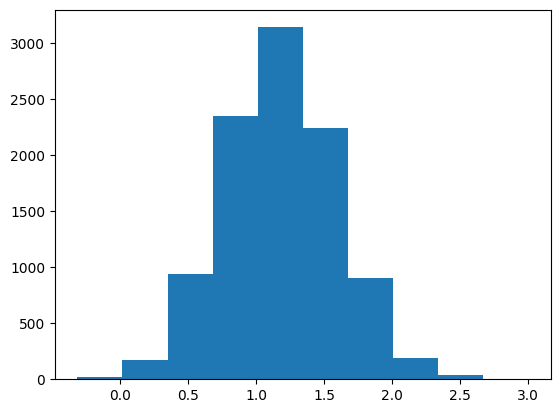

In [64]:
# This is diffs plot
plt.hist(diffs)

In [65]:
#Now let's get p-value
p_value = min(
    np.mean(np.array(diffs) <= 0),
    np.mean(np.array(diffs)>0)
)

In [66]:
p_value

np.float64(0.0022)

Ok p-value $\lt$ α (0.05)
> I reject null hypothesis
$$H_0 : \mu_{Dell_R}\ - \mu_{Lenovo_R} \leq 0$$

- I can now tell there are difference between mean dell and lenovo and in the model I will see the difference and more information

## Modeling

**Now** let's create models

> But we should make new dataframe for model to make good model

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

Spliting companies to three groups to make dummy variables will be  more easy

In [68]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [69]:
def group_company(company):
  """
  params : company : company name is got from apply funcion in company column
  This function split companies to 3 groups ('Premium' , 'Midium' , 'Low')
  to Add it to the model
  """
  if company in ['Apple', 'HP', 'Dell', 'Lenovo', 'Asus', 'Acer', 'MSI']:
    return 'Premium'
  elif company in ['Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Razer', 'Samsung', 'LG']:
    return 'Mid'
  else:
    return 'Low'

In [70]:
model_laptops_df = df.join(
    pd.DataFrame({'Company-tier' : df['Company'].apply(group_company)})) \
.drop('Company' , axis = 1)

> Apply our function `group_company` to **Company** column and naming column to **Company-tier** and join it to our laptops dataframe with dropping **Company** column

In [71]:
model_laptops_df.head()

,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenRes,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,Storage,PrimaryStorage,PrimaryStorageType,SecondaryStorage?,SecondaryStorage,SecondaryStorageType,GPU_company,GPU_model,Company-tier
0,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560x1600,2560,1600,No,Yes,Yes,Intel,2.3,Core i5,128,128,SSD,False,0,No,Intel,Iris Plus Graphics 640,Premium
1,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440x900,1440,900,No,No,No,Intel,1.8,Core i5,128,128,Flash Storage,False,0,No,Intel,HD Graphics 6000,Premium
2,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,256,SSD,False,0,No,Intel,HD Graphics 620,Premium
3,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880x1800,2880,1800,No,Yes,Yes,Intel,2.7,Core i7,512,512,SSD,False,0,No,AMD,Radeon Pro 455,Premium
4,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560x1600,2560,1600,No,Yes,Yes,Intel,3.1,Core i5,256,256,SSD,False,0,No,Intel,Iris Plus Graphics 650,Premium


In [72]:
# importing sklearn needed modules
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
#I think that's enough at this moment

In [73]:
model_laptops_df['Company-tier'].unique()

array(['Premium', 'Low', 'Mid'], dtype=object)

In [74]:
model_laptops_df = model_laptops_df.join(
    pd.get_dummies(model_laptops_df['Company-tier'], dtype =int)
    ).drop(['Low' , 'Company-tier'] , axis =1 )

In [75]:
model_laptops_df.head()

,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenRes,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,Storage,PrimaryStorage,PrimaryStorageType,SecondaryStorage?,SecondaryStorage,SecondaryStorageType,GPU_company,GPU_model,Mid,Premium
0,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560x1600,2560,1600,No,Yes,Yes,Intel,2.3,Core i5,128,128,SSD,False,0,No,Intel,Iris Plus Graphics 640,0,1
1,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440x900,1440,900,No,No,No,Intel,1.8,Core i5,128,128,Flash Storage,False,0,No,Intel,HD Graphics 6000,0,1
2,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,256,SSD,False,0,No,Intel,HD Graphics 620,0,1
3,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880x1800,2880,1800,No,Yes,Yes,Intel,2.7,Core i7,512,512,SSD,False,0,No,AMD,Radeon Pro 455,0,1
4,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560x1600,2560,1600,No,Yes,Yes,Intel,3.1,Core i5,256,256,SSD,False,0,No,Intel,Iris Plus Graphics 650,0,1


In [76]:
# Now I think we should drop some unnecssary columns from model laptops dataframe
model_laptops_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product               1275 non-null   object 
 1   TypeName              1275 non-null   object 
 2   Inches                1275 non-null   float64
 3   Ram                   1275 non-null   int64  
 4   OS                    1275 non-null   object 
 5   Weight                1275 non-null   float64
 6   Price_euros           1275 non-null   float64
 7   Screen                1275 non-null   object 
 8   ScreenRes             1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

#### I think we should make more than one model:

- So I will split each section or item to specific model

In [77]:
model_laptops_df.drop(["Product" , "ScreenRes"  , "Touchscreen" , "IPSpanel" ,"RetinaDisplay" ,"CPU_model" , "GPU_model" , 'SecondaryStorage?'] , axis=1 , inplace=True)

In [78]:
model_laptops_df.head()

,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,CPU_company,CPU_freq,Storage,PrimaryStorage,PrimaryStorageType,SecondaryStorage,SecondaryStorageType,GPU_company,Mid,Premium
0,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,1600,Intel,2.3,128,128,SSD,0,No,Intel,0,1
1,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,900,Intel,1.8,128,128,Flash Storage,0,No,Intel,0,1
2,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,1080,Intel,2.5,256,256,SSD,0,No,Intel,0,1
3,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,1800,Intel,2.7,512,512,SSD,0,No,AMD,0,1
4,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,1600,Intel,3.1,256,256,SSD,0,No,Intel,0,1


In [79]:
df['TypeName'].value_counts()

,count
TypeName,
Notebook,707
Gaming,205
Ultrabook,194
2 in 1 Convertible,117
Workstation,29
Netbook,23


In [80]:
# Making typename column to dummy variables and make notebook as a baseline
model_laptops_df = model_laptops_df.join(pd.get_dummies(model_laptops_df['TypeName'] , dtype=int).drop('Notebook' , axis =1)).drop('TypeName' , axis=1)

In [81]:
model_laptops_df

,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,CPU_company,CPU_freq,Storage,PrimaryStorage,PrimaryStorageType,SecondaryStorage,SecondaryStorageType,GPU_company,Mid,Premium,2 in 1 Convertible,Gaming,Netbook,Ultrabook,Workstation
0,13.3,8,macOS,1.37,1339.69,Standard,2560,1600,Intel,2.3,128,128,SSD,0,No,Intel,0,1,0,0,0,1,0
1,13.3,8,macOS,1.34,898.94,Standard,1440,900,Intel,1.8,128,128,Flash Storage,0,No,Intel,0,1,0,0,0,1,0
2,15.6,8,No OS,1.86,575.00,Full HD,1920,1080,Intel,2.5,256,256,SSD,0,No,Intel,0,1,0,0,0,0,0
3,15.4,16,macOS,1.83,2537.45,Standard,2880,1800,Intel,2.7,512,512,SSD,0,No,AMD,0,1,0,0,0,1,0
4,13.3,8,macOS,1.37,1803.60,Standard,2560,1600,Intel,3.1,256,256,SSD,0,No,Intel,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,14.0,4,Windows 10,1.80,638.00,Full HD,1920,1080,Intel,2.5,128,128,SSD,0,No,Intel,0,1,1,0,0,0,0
1271,13.3,16,Windows 10,1.30,1499.00,Quad HD+,3200,1800,Intel,2.5,512,512,SSD,0,No,Intel,0,1,1,0,0,0,0
1272,14.0,2,Windows 10,1.50,229.00,Standard,1366,768,Intel,1.6,64,64,Flash Storage,0,No,Intel,0,1,0,0,0,0,0
1273,15.6,6,Windows 10,2.19,764.00,Standard,1366,768,Intel,2.5,1024,1024,HDD,0,No,AMD,0,1,0,0,0,0,0


In [82]:
model_laptops_df['OS'].value_counts()

,count
OS,
Windows 10,1048
No OS,66
Linux,58
Windows 7,45
Chrome OS,27
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


- I will drop android
- I will make 5 groups for linux , windows , mac os  , chrome os and no OS

In [83]:
model_laptops_df.drop(model_laptops_df.query('OS == "Android"').index , inplace = True)

In [84]:
model_laptops_df.query('OS == "Android"').shape[0]

0

In [85]:
def group_os(os):
  if os in ['Windows 7' , 'Windows 10','Windows 10 S']:
    return 'Windows'
  elif os in ['Mac OS X' , 'macOS']:
    return 'mac OS'
  else: return os
model_laptops_df['OS'] = model_laptops_df['OS'].apply(group_os)

In [86]:
model_laptops_df['OS'].unique()

array(['mac OS', 'No OS', 'Windows', 'Linux', 'Chrome OS'], dtype=object)

In [87]:
model_laptops_df = model_laptops_df.join(
    pd.get_dummies(model_laptops_df['OS'],dtype=int).drop('No OS' , axis =1)
    ).drop('OS' ,axis=1) # making OS to dummy variables and make No OS as a baseline

In [88]:
model_laptops_df.head()

,Inches,Ram,Weight,Price_euros,Screen,ScreenW,ScreenH,CPU_company,CPU_freq,Storage,PrimaryStorage,PrimaryStorageType,SecondaryStorage,SecondaryStorageType,GPU_company,Mid,Premium,2 in 1 Convertible,Gaming,Netbook,Ultrabook,Workstation,Chrome OS,Linux,Windows,mac OS
0,13.3,8,1.37,1339.69,Standard,2560,1600,Intel,2.3,128,128,SSD,0,No,Intel,0,1,0,0,0,1,0,0,0,0,1
1,13.3,8,1.34,898.94,Standard,1440,900,Intel,1.8,128,128,Flash Storage,0,No,Intel,0,1,0,0,0,1,0,0,0,0,1
2,15.6,8,1.86,575.00,Full HD,1920,1080,Intel,2.5,256,256,SSD,0,No,Intel,0,1,0,0,0,0,0,0,0,0,0
3,15.4,16,1.83,2537.45,Standard,2880,1800,Intel,2.7,512,512,SSD,0,No,AMD,0,1,0,0,0,1,0,0,0,0,1
4,13.3,8,1.37,1803.60,Standard,2560,1600,Intel,3.1,256,256,SSD,0,No,Intel,0,1,0,0,0,1,0,0,0,0,1


In [89]:
#making dummy variables also to screen
model_laptops_df = model_laptops_df.join(pd.get_dummies(model_laptops_df['Screen'], dtype=int).drop('Standard' , axis=1)).drop('Screen' , axis=1)

In [90]:
model_laptops_df.head()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_company,CPU_freq,Storage,PrimaryStorage,PrimaryStorageType,SecondaryStorage,SecondaryStorageType,GPU_company,Mid,Premium,2 in 1 Convertible,Gaming,Netbook,Ultrabook,Workstation,Chrome OS,Linux,Windows,mac OS,4K Ultra HD,Full HD,Quad HD+
0,13.3,8,1.37,1339.69,2560,1600,Intel,2.3,128,128,SSD,0,No,Intel,0,1,0,0,0,1,0,0,0,0,1,0,0,0
1,13.3,8,1.34,898.94,1440,900,Intel,1.8,128,128,Flash Storage,0,No,Intel,0,1,0,0,0,1,0,0,0,0,1,0,0,0
2,15.6,8,1.86,575.00,1920,1080,Intel,2.5,256,256,SSD,0,No,Intel,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,15.4,16,1.83,2537.45,2880,1800,Intel,2.7,512,512,SSD,0,No,AMD,0,1,0,0,0,1,0,0,0,0,1,0,0,0
4,13.3,8,1.37,1803.60,2560,1600,Intel,3.1,256,256,SSD,0,No,Intel,0,1,0,0,0,1,0,0,0,0,1,0,0,0


In [91]:
#making dummy variables primary and secondary storage types and cpu and gpu companies
def dummy_variables(data , baseline , prefix):
  """
  This function return dummy variables for column
  parmas: data : column data
          baseline: variable will be the constant in the models
          prefix: prefix of dummy variables names
  """
  return model_laptops_df.join(
      pd.get_dummies(data , dtype=int).drop(baseline , axis = 1).add_prefix(prefix)
      ).drop(data.name , axis =1)

In [92]:
model_laptops_df = dummy_variables(model_laptops_df['PrimaryStorageType'] , 'HDD' , 'Primary_')
# making dummy variables to primary storage type and make hdd the baseline and giving dummy variables Primary_ as the prefix

In [93]:
model_laptops_df.head()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_company,CPU_freq,Storage,PrimaryStorage,SecondaryStorage,SecondaryStorageType,GPU_company,Mid,Premium,2 in 1 Convertible,Gaming,Netbook,Ultrabook,Workstation,Chrome OS,Linux,Windows,mac OS,4K Ultra HD,Full HD,Quad HD+,Primary_Flash Storage,Primary_Hybrid,Primary_SSD
0,13.3,8,1.37,1339.69,2560,1600,Intel,2.3,128,128,0,No,Intel,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1,13.3,8,1.34,898.94,1440,900,Intel,1.8,128,128,0,No,Intel,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2,15.6,8,1.86,575.00,1920,1080,Intel,2.5,256,256,0,No,Intel,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,15.4,16,1.83,2537.45,2880,1800,Intel,2.7,512,512,0,No,AMD,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4,13.3,8,1.37,1803.60,2560,1600,Intel,3.1,256,256,0,No,Intel,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [94]:
model_laptops_df=dummy_variables(model_laptops_df['SecondaryStorageType'] , 'No' , 'Secondary_')
# making dummy variables to secondary storage type and make No the baseline and giving dummy variables Secondary_ as the prefix

In [95]:
model_laptops_df.head()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_company,CPU_freq,Storage,PrimaryStorage,SecondaryStorage,GPU_company,Mid,Premium,2 in 1 Convertible,Gaming,Netbook,Ultrabook,Workstation,Chrome OS,Linux,Windows,mac OS,4K Ultra HD,Full HD,Quad HD+,Primary_Flash Storage,Primary_Hybrid,Primary_SSD,Secondary_HDD,Secondary_Hybrid,Secondary_SSD
0,13.3,8,1.37,1339.69,2560,1600,Intel,2.3,128,128,0,Intel,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,13.3,8,1.34,898.94,1440,900,Intel,1.8,128,128,0,Intel,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,15.6,8,1.86,575.00,1920,1080,Intel,2.5,256,256,0,Intel,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,15.4,16,1.83,2537.45,2880,1800,Intel,2.7,512,512,0,AMD,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,13.3,8,1.37,1803.60,2560,1600,Intel,3.1,256,256,0,Intel,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [96]:
model_laptops_df['CPU_company'].unique()

array(['Intel', 'AMD', 'Samsung'], dtype=object)

In [97]:
model_laptops_df = dummy_variables(model_laptops_df['CPU_company'] , 'Intel' , 'CPU_')
# making dummy variables to CPU company and make intel the baseline and giving dummy variables CPU_ as the prefix

In [98]:
model_laptops_df.head()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,Storage,PrimaryStorage,SecondaryStorage,GPU_company,Mid,Premium,2 in 1 Convertible,Gaming,Netbook,Ultrabook,Workstation,Chrome OS,Linux,Windows,mac OS,4K Ultra HD,Full HD,Quad HD+,Primary_Flash Storage,Primary_Hybrid,Primary_SSD,Secondary_HDD,Secondary_Hybrid,Secondary_SSD,CPU_AMD,CPU_Samsung
0,13.3,8,1.37,1339.69,2560,1600,2.3,128,128,0,Intel,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,13.3,8,1.34,898.94,1440,900,1.8,128,128,0,Intel,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,15.6,8,1.86,575.00,1920,1080,2.5,256,256,0,Intel,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,15.4,16,1.83,2537.45,2880,1800,2.7,512,512,0,AMD,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,13.3,8,1.37,1803.60,2560,1600,3.1,256,256,0,Intel,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [99]:
model_laptops_df = dummy_variables(model_laptops_df['GPU_company'] , 'Intel' , 'GPU_')
# making dummy variables to GPU company and make intel the baseline and giving dummy variables GPU_ as the prefix

In [100]:
model_laptops_df.head()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,Storage,PrimaryStorage,SecondaryStorage,Mid,Premium,2 in 1 Convertible,Gaming,Netbook,Ultrabook,Workstation,Chrome OS,Linux,Windows,mac OS,4K Ultra HD,Full HD,Quad HD+,Primary_Flash Storage,Primary_Hybrid,Primary_SSD,Secondary_HDD,Secondary_Hybrid,Secondary_SSD,CPU_AMD,CPU_Samsung,GPU_AMD,GPU_ARM,GPU_Nvidia
0,13.3,8,1.37,1339.69,2560,1600,2.3,128,128,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,13.3,8,1.34,898.94,1440,900,1.8,128,128,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,15.6,8,1.86,575.00,1920,1080,2.5,256,256,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,15.4,16,1.83,2537.45,2880,1800,2.7,512,512,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,13.3,8,1.37,1803.60,2560,1600,3.1,256,256,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [101]:
model_laptops_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1274
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Inches                 1273 non-null   float64
 1   Ram                    1273 non-null   int64  
 2   Weight                 1273 non-null   float64
 3   Price_euros            1273 non-null   float64
 4   ScreenW                1273 non-null   int64  
 5   ScreenH                1273 non-null   int64  
 6   CPU_freq               1273 non-null   float64
 7   Storage                1273 non-null   int64  
 8   PrimaryStorage         1273 non-null   int64  
 9   SecondaryStorage       1273 non-null   int64  
 10  Mid                    1273 non-null   int64  
 11  Premium                1273 non-null   int64  
 12  2 in 1 Convertible     1273 non-null   int64  
 13  Gaming                 1273 non-null   int64  
 14  Netbook                1273 non-null   int64  
 15  Ultrabook

Last thing. Converting all continous columns to standard scale

In [102]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_continous = model_laptops_df.loc[: , :'SecondaryStorage'] # storing all continous columns
model_laptops_df.loc[: , :'SecondaryStorage'] = scale.fit_transform(X_continous)

In [103]:
model_laptops_df.head() # That's very nice

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,Storage,PrimaryStorage,SecondaryStorage,Mid,Premium,2 in 1 Convertible,Gaming,Netbook,Ultrabook,Workstation,Chrome OS,Linux,Windows,mac OS,4K Ultra HD,Full HD,Quad HD+,Primary_Flash Storage,Primary_Hybrid,Primary_SSD,Secondary_HDD,Secondary_Hybrid,Secondary_SSD,CPU_AMD,CPU_Samsung,GPU_AMD,GPU_ARM,GPU_Nvidia
0,-1.221653,-0.087852,-1.007996,0.290694,1.337254,1.853465,-0.008623,-1.024315,-0.867931,-0.423841,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,-1.221653,-0.087852,-1.052952,-0.338535,-0.932069,-0.611746,-1.002896,-1.024315,-0.867931,-0.423841,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0.401913,-0.087852,-0.273706,-0.801001,0.040498,0.022165,0.389087,-0.758615,-0.517600,-0.423841,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,0.260733,1.481770,-0.318663,2.000653,1.985632,2.557811,0.786796,-0.227217,0.183060,-0.423841,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,-1.221653,-0.087852,-1.007996,0.952986,1.337254,1.853465,1.582215,-0.758615,-0.517600,-0.423841,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


Now I want to make linear regression model for price prediction and model features will be **CPU** and **GPU** companies

> Intel is the baseline

In [151]:
X = model_laptops_df[[col for col in model_laptops_df.drop('CPU_freq' , axis=1).columns if col.startswith('CPU_') or col.startswith('GPU_')]] # getting only columns starts with cpu and gpu
y = model_laptops_df['Price_euros']

# Spliting X , y to train data and test data (test data 20% from whole data)
X_train , X_test , y_train , y_test = train_test_split(X,y
                                                       , test_size=.20)

In [152]:
lm = LinearRegression().fit(X_train , y_train)

In [153]:
# Printing coefs of all features
pd.DataFrame(index=lm.feature_names_in_ , data=lm.coef_ , columns=['coef'])

,coef
CPU_AMD,-0.475233
CPU_Samsung,-0.253907
GPU_AMD,-0.134000
GPU_ARM,-0.253907
GPU_Nvidia,0.685392


In [169]:
lm.intercept_

np.float64(-0.17326688652163486)

In [154]:
# Printing R-squared
print(lm.score(X_train , y_train))
# Printing coefficient correlation
np.sqrt(lm.score(X_train , y_train))

0.13222698263728894


np.float64(0.3636302828936129)

coefficient correlation of this model is weak is equal to 0.36

In [155]:
# Printing p-values of each feature
from statsmodels.api import OLS , add_constant
sms_lm = OLS(y_train , add_constant(X_train)).fit()
print(sms_lm.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.129    
Dependent Variable: Price_euros      AIC:                2776.6719
Date:               2025-05-06 19:43 BIC:                2801.2998
No. Observations:   1018             Log-Likelihood:     -1383.3  
Df Model:           4                F-statistic:        38.59    
Df Residuals:       1013             Prob (F-statistic): 4.32e-30 
R-squared:          0.132            Scale:              0.89119  
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
const          -0.1733    0.0399  -4.3472  0.0000  -0.2515  -0.0951
CPU_AMD        -0.4752    0.1705  -2.7878  0.0054  -0.8098  -0.1407
CPU_Samsung    -0.2539    0.4724  -0.5374  0.5911  -1.1810   0.6732
GPU_AMD        -0.1340    0.1062  -1.2619  0.2073  -0.3424   0.0744
GPU_AR

Ok let's inpertept p-values:
##### In CPU:
All features are statistically significant except Samsung because p-value greater than α (=0.05)
#### In GPU:
Also all features are statistically significant except ARM and AMD because also p-value greater than α


> That's mean there arn't any difference between All features are greater than α and Intel in CPU and GPU

In [177]:
# Now I want to use random forest to see effect of each feature on y_response
reggr = RandomForestRegressor().fit(X_train , y_train)

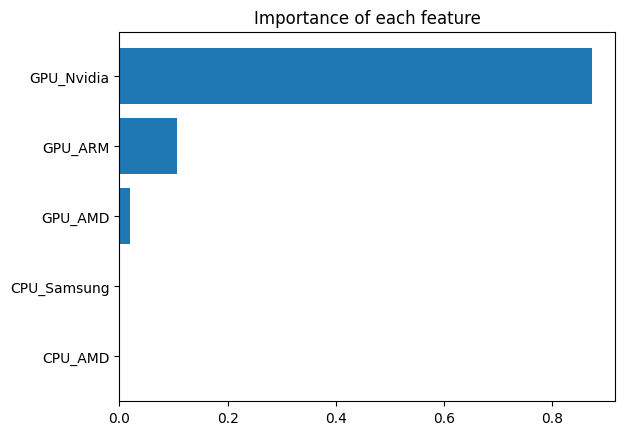

In [178]:
plt.barh(range(X.shape[1]) , sorted(reggr.feature_importances_));
plt.yticks(range(X.shape[1]) , reggr.feature_names_in_);
plt.title('Importance of each feature');

In CPU:

Samsung and AMD not used in the model to predict y

In [185]:
# Testing the model
predicted_y = reggr.predict(X_test)
results = pd.DataFrame({'Real_values':y_test
              ,'Predicted_values':predicted_y})
results

,Real_values,Predicted_values
370,-0.052923,0.507553
732,-0.693929,-0.783909
759,-0.766738,-0.174364
1141,0.009607,0.507553
865,-0.322745,-0.174364
...,...,...
1177,0.241169,0.507553
1131,1.305297,0.507553
337,0.011321,-0.174364
652,0.448033,-0.174364


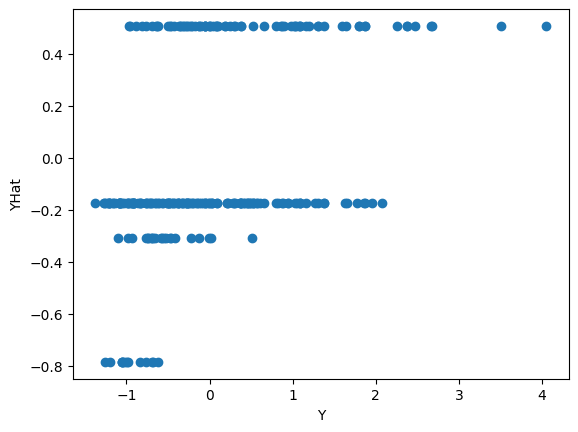

In [188]:
plt.scatter(y_test , predicted_y);
plt.ylabel('YHat');
plt.xlabel('Y');

this model is weak

> That's excpected because coefficient correlation is weak so model Y̋ will be different from y-test